In [1]:
# !pip install segmentation-models --upgrade
# !pip install tensorflow --upgrade
# !pip install keras --upgrade
# !pip install keras-tuner --upgrade
#!pip install -q tensorflow==2.10.1
#!pip install -q keras==2.10
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [2]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [3]:
def load_model(model_path):
    """Load a pre-trained U-Net model."""
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Model file not found at {model_path}")
    return tf.keras.models.load_model(model_path, compile=False)

In [ ]:
model_path = r'Segmentation_MOdel_Path'
model = load_model(model_path)
h = 256       # deciding the image size
w = 256

In [5]:
def predict_mask(model, eye_image):
    img_input = np.expand_dims(eye_image, axis=0)
    print(np.shape(img_input))
    mask = model.predict(img_input)
    return mask

In [ ]:
image_path = r'Test_Image_Path'

In [7]:
eye_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
eye_image = cv2.resize(eye_image, (256, 256))
eye_image = cv2.cvtColor(eye_image, cv2.COLOR_RGB2BGR)
eye_image = eye_image / 255.0

In [8]:
mask = predict_mask(model, eye_image)
mask = mask*255
mask = np.squeeze(mask)

(1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


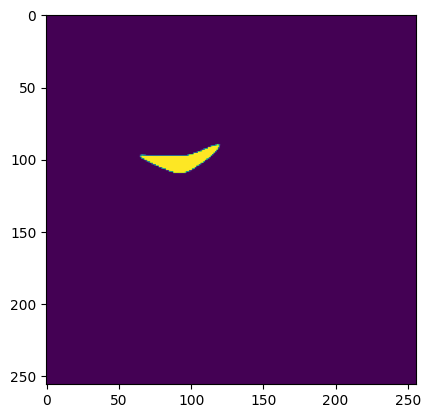

In [9]:
plt.imshow(mask)

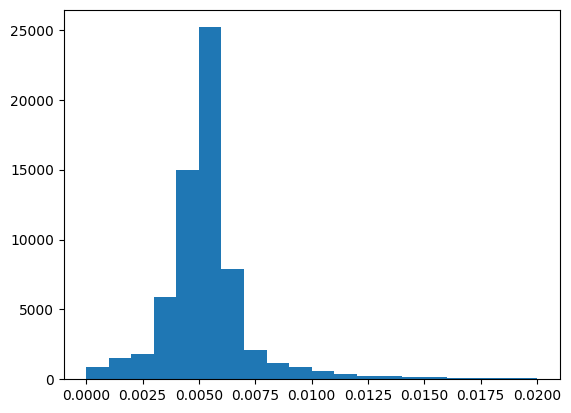

In [10]:
plt.hist(mask.ravel(),20,[0,0.02]); plt.show()

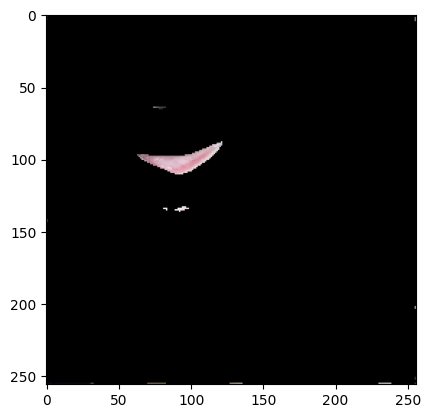

In [11]:
ret,th1 = cv2.threshold(mask,0.025,255,cv2.THRESH_BINARY)
th1 = np.expand_dims(th1,axis=-1)
th1 = th1/255
cropped_eye_img = th1 * (eye_image)
plt.imshow(np.squeeze( cropped_eye_img))